In [24]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle
import glob
import os

In [25]:
bid_sample_group = pickle.load(open("/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/intelligent_bidding/data/bids_data/max_600/bids_data_2020-07-01_13-52-24.p", "rb"))
bid_sample_group[2]



[195.0,
 30877.873556385788,
 array([2.04424596e+00, 1.41908512e+01, 0.00000000e+00, 0.00000000e+00,
        6.00000000e+02, 6.02766562e+00, 7.28695393e-01, 6.00000000e+02,
        1.44583635e+01, 6.00000000e+02, 5.77792603e+02, 6.44108353e+01,
        0.00000000e+00, 0.00000000e+00, 6.00000000e+02, 6.00000000e+02,
        7.15104008e+00, 2.16107674e+01, 1.73979092e+01, 6.00000000e+02,
        5.61192017e+02, 5.88955444e+02, 6.00000000e+02, 5.88054871e+02,
        6.00000000e+02, 0.00000000e+00, 6.00000000e+02, 3.41457214e+01,
        6.00000000e+02, 6.00000000e+02, 6.00000000e+02, 2.66028996e+01,
        6.00000000e+02, 1.20462656e+00, 5.68229736e+02, 0.00000000e+00,
        0.00000000e+00, 5.65221863e+02, 5.78055420e+02, 6.00000000e+02,
        5.83905090e+02, 2.83956394e+01, 5.80218445e+02, 5.97625977e+02,
        2.65081853e-01, 6.00000000e+02, 0.00000000e+00, 1.37567205e+01,
        5.90505859e+02, 6.00000000e+02, 3.65707169e+01, 0.00000000e+00,
        6.00000000e+02, 5.04926491e

In [26]:
    # pd.DataFrame(bid_sample, index = list(range(len(bid_sample[0][2]))), columns=list(range(len(bid_sample[0]))))

set_of_bids_df = pd.DataFrame(np.concatenate([sample[2] for sample in bid_sample_group]))
set_of_bids_df.head()

,0
0,3.667849
1,0.000000
2,0.000000
3,0.000000
4,600.000000


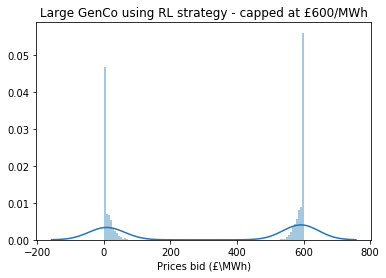

In [27]:
sns.distplot(set_of_bids_df, bins=100)
plt.title("Large GenCo using RL strategy - capped at £600/MWh")
plt.xlabel("Prices bid (£\MWh)")

set_of_bids_df.to_csv("/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/intelligent_bidding/data/processed/bids/set_of_bids_df_large_company_600.csv")

In [28]:
# pd.DataFrame(bid_sample, index = list(range(len(bid_sample[0][2]))), columns=list(range(len(bid_sample[0]))))

# bid_sample_600
colnames = ['hour_segment', 'demand_segment', 'bids']

# [{colname:item for sample in bid_sample_600 for (colname, item) in zip(cycle(colnames), sample)}]

list_of_dicts = []
for item in bid_sample_group:
#     for item in sample:
    dict_data = {"hour_segment": item[0], "demand_segment": item[1], "bids": item[2]}
    list_of_dicts.append(dict_data)
list_df = pd.DataFrame.from_dict(list_of_dicts)

long_values_df = pd.DataFrame(list_df['bids'].to_list(), columns=list(range(len(bid_sample_group[0][2]))))
long_values_df[['hour_segment','demand_segment']] = list_df[['hour_segment','demand_segment']]
long_values_df = long_values_df.melt(id_vars=['hour_segment','demand_segment'])
long_values_df

,hour_segment,demand_segment,variable,value
0,65.0,31597.983822,0,3.667849
1,130.0,31071.093673,0,0.000000
2,195.0,30877.873556,0,2.044246
3,260.0,30841.340341,0,8.445005
4,325.0,30204.850546,0,20.147657
...,...,...,...,...
5179,1300.0,7318.820795,215,575.074890
5180,1365.0,6088.057364,215,575.884094
5181,1430.0,5220.190539,215,579.085144
5182,1495.0,5153.618902,215,580.796204


Text(0.5, 6.79999999999999, 'Prices bid (£\\MWh)')

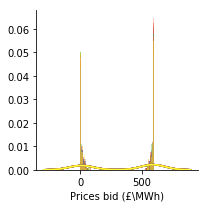

In [29]:
# sns.distplot(long_values_df, hue="demand_segment")

g = sns.FacetGrid(long_values_df, hue="demand_segment", palette="Set1")
g = (g.map(sns.distplot, "value", bins=100))
plt.xlabel("Prices bid (£\MWh)")

In [30]:
bid_sample_small_genco = pickle.load(open("/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/intelligent_bidding/data/bids_data/max_600/bids_data_2020-07-01_14-26-07.p", "rb"))
bid_sample_small_genco[2]


[99.0, 53599.99676801369, array([600.        ,  24.79052544, 599.95678711])]

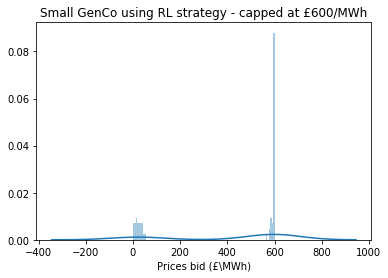

In [31]:
set_of_bids_df = pd.DataFrame(np.concatenate([sample[2] for sample in bid_sample_small_genco]))
set_of_bids_df

sns.distplot(set_of_bids_df, bins=100)
plt.title("Small GenCo using RL strategy - capped at £600/MWh")
plt.xlabel("Prices bid (£\MWh)")

set_of_bids_df.to_csv("/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/intelligent_bidding/data/processed/bids/set_of_bids_df_small_company_600.csv")




# Max bid = 150

In [32]:
bid_sample_group = pickle.load(open("/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/intelligent_bidding/data/bids_data/max_150/bids_data_2020-07-01_18-42-32.p", "rb"))
bid_sample_group[2]




[78.0,
 49719.296516300936,
 array([140.31417847, 147.17393494,   0.        , 145.60494995,
        150.        ,   3.35119677,  11.83002281,   0.        ,
        150.        , 136.82814026,   0.        , 150.        ,
        148.87464905, 150.        , 146.86129761,   8.72437954,
          5.04022503,   0.        , 150.        , 146.05029297,
          4.20770311,   0.        ,   0.        , 150.        ,
        150.        ,   0.        , 150.        ,   0.        ,
          0.        , 150.        ,   0.        ,   0.        ,
          1.37835121, 150.        , 147.32841492,   6.40104675,
          0.        ,   0.        ,   0.        , 150.        ,
        150.        , 148.15840149,   0.        , 150.        ,
          6.4102416 , 150.        , 146.11366272,   7.95176792,
        145.23522949,   0.        ,   0.74683177,   0.        ,
        150.        , 150.        ,   9.81538677, 150.        ,
          0.        ,   8.67985535,   4.6868515 ,   3.00677562,
        143.

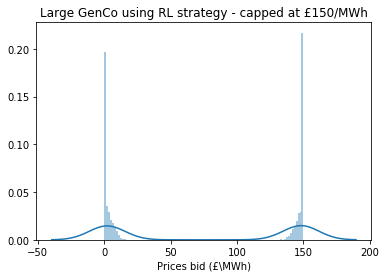

In [33]:
set_of_bids_df_150 = pd.DataFrame(np.concatenate([sample[2] for sample in bid_sample_group]))
set_of_bids_df_150.head()

sns.distplot(set_of_bids_df_150, bins=100)
plt.title("Large GenCo using RL strategy - capped at £150/MWh")
plt.xlabel("Prices bid (£\MWh)")

set_of_bids_df_150.to_csv("/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/intelligent_bidding/data/processed/bids/large_company_150.csv")

In [34]:
bid_sample_group = pickle.load(open("/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/intelligent_bidding/data/bids_data/max_150/bids_data_2020-07-01_18-42-39.p", "rb"))
bid_sample_group[2]


[159.0, 51219.007384962926, array([2.09700942, 0.        , 0.        ])]

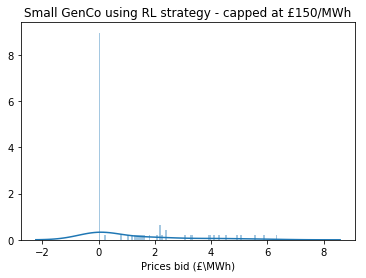

In [35]:
set_of_bids_df_150 = pd.DataFrame(np.concatenate([sample[2] for sample in bid_sample_group]))
set_of_bids_df_150.head()


sns.distplot(set_of_bids_df_150, bins=100)
plt.title("Small GenCo using RL strategy - capped at £150/MWh")
plt.xlabel("Prices bid (£\MWh)")

set_of_bids_df_150.to_csv("/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/intelligent_bidding/data/processed/bids/set_of_bids_df_small_company_150.csv")

## Visualising bids over time

In [36]:
file_list = glob.glob("/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/intelligent_bidding/data/bids_data/max_600/*.p")

small_company_list = []
big_company_list = []

counter = 0
for file_path in file_list:
    counter += 1
    if counter % 50 == 0:
        date_time = "2020/07/01_"+file_path.split("/")[-1].split("01_")[-1].split(".")[0].split(" ")[0]

        tmp_bid_dat = pickle.load(open(file_path, "rb"))

        tmp_df = pd.DataFrame(np.concatenate([sample[2] for sample in tmp_bid_dat]))
        tmp_df['timestamp'] = date_time
    #     tmp_df['hour_segment'] = tmp_df[0]
    #     tmp_df['demand_segment'] = tmp_df[1]

        if len(tmp_bid_dat[0][2]) > 5:
            big_company_list.append(tmp_df)
        else:
            small_company_list.append(tmp_df)


small_company_df = pd.concat(small_company_list)
small_company_df['timestamp'] = pd.to_datetime(small_company_df['timestamp'], format="%Y/%m/%d_%H-%M-%S")        
small_company_df.to_csv("/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/intelligent_bidding/data/processed/small_company_df.csv")

big_company_df = pd.concat(big_company_list)
big_company_df['timestamp'] = pd.to_datetime(big_company_df['timestamp'], format="%Y/%m/%d_%H-%M-%S")        
big_company_df.to_csv("/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/intelligent_bidding/data/processed/big_company_df.csv")


In [37]:
file_list = glob.glob("/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/intelligent_bidding/data/bids_data/max_150/*.p")

small_company_list = []
big_company_list = []

counter = 0
for file_path in file_list:
    counter += 1
    if counter % 50 == 0:
        date_time = "2020/07/01_"+file_path.split("/")[-1].split("01_")[-1].split(".")[0].split(" ")[0]

        tmp_bid_dat = pickle.load(open(file_path, "rb"))

        tmp_df = pd.DataFrame(np.concatenate([sample[2] for sample in tmp_bid_dat]))
        tmp_df['timestamp'] = date_time
    #     tmp_df['hour_segment'] = tmp_df[0]
    #     tmp_df['demand_segment'] = tmp_df[1]

        if len(tmp_bid_dat[0][2]) > 5:
            big_company_list.append(tmp_df)
        else:
            small_company_list.append(tmp_df)


small_company_df = pd.concat(small_company_list)
small_company_df['timestamp'] = pd.to_datetime(small_company_df['timestamp'], format="%Y/%m/%d_%H-%M-%S")        
small_company_df.to_csv("/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/intelligent_bidding/data/processed/small_company_df_150.csv")

big_company_df = pd.concat(big_company_list)
big_company_df['timestamp'] = pd.to_datetime(big_company_df['timestamp'], format="%Y/%m/%d_%H-%M-%S")        
big_company_df.to_csv("/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/intelligent_bidding/data/processed/big_company_df_150.csv")

